# Regresion Logistica

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #para que no salgan mensajes que no nos interesan

from pandas import Series,DataFrame


import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

# Regresion logistica sobre cancer

In [3]:
address='cancer.csv'
cancer=pd.read_csv(address)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer3 = cancer.drop(['id','diagnosis'],axis = 1)

# Matriz de correlacion

In [5]:
tc = cancer3.corr()
tc #Vemos que hay muchas caracteristicas correlacionadas

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,NaN


# Función para eliminar columnas correlacionadas

In [6]:
def correlation(dataset, threshold): 
    col_corr = set() # Conjunto de todos los nombres de columnas a borrar 
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)): 
     for j in range(i): 
      if corr_matrix.iloc[i, j] >= threshold: 
       colname = corr_matrix.columns[i] # Obtener nombre de la columna 
       col_corr.add(colname) 
       if colname in dataset.columns: 
        del dataset[colname] # Borrar la columna 
    return(dataset) 

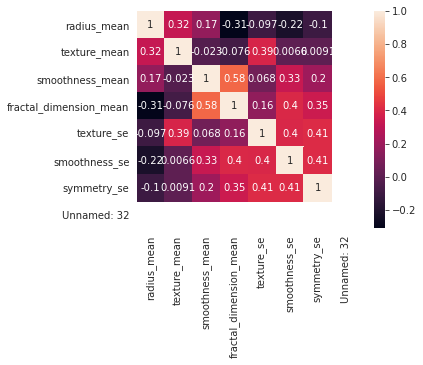

In [7]:
cancer3 = correlation(cancer3,0.6)
tc = cancer3.corr()
sb.heatmap(tc, annot = True) #Ya no hay correlaciones altas

In [8]:
cancer3.dropna(axis = 1,inplace = True)
cancer3.dropna(inplace = True)
cancer3 #Solo nos quedan 7 caracteristicas

,radius_mean,texture_mean,smoothness_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
0,17.99,10.38,0.11840,0.07871,0.9053,0.006399,0.03003
1,20.57,17.77,0.08474,0.05667,0.7339,0.005225,0.01389
2,19.69,21.25,0.10960,0.05999,0.7869,0.006150,0.02250
3,11.42,20.38,0.14250,0.09744,1.1560,0.009110,0.05963
4,20.29,14.34,0.10030,0.05883,0.7813,0.011490,0.01756
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.05623,1.2560,0.010300,0.01114
565,20.13,28.25,0.09780,0.05533,2.4630,0.005769,0.01898
566,16.60,28.08,0.08455,0.05648,1.0750,0.005903,0.01318
567,20.60,29.33,0.11780,0.07016,1.5950,0.006522,0.02324


# Checando valores faltantes 

In [9]:
cancer3.isnull().sum()

radius_mean               0
texture_mean              0
smoothness_mean           0
fractal_dimension_mean    0
texture_se                0
smoothness_se             0
symmetry_se               0
dtype: int64

# Checar si el objetivo es binario u ordinal

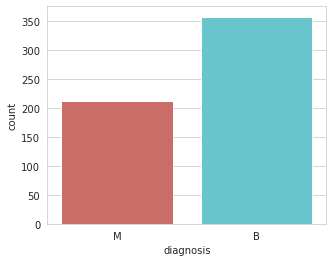

In [10]:
sb.countplot(x='diagnosis',data=cancer,palette='hls')

# Checar el tamaño de nuestro conjunto de datos es suficiente

In [11]:
cancer3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   fractal_dimension_mean  569 non-null    float64
 4   texture_se              569 non-null    float64
 5   smoothness_se           569 non-null    float64
 6   symmetry_se             569 non-null    float64
dtypes: float64(7)
memory usage: 35.6 KB


In [12]:
cancer_data= cancer3.iloc[:,:].values #Los valores de cancer3 en un array  
y=cancer.iloc[:,1].values #Los valores de la variable objetivo 'diagnosis'

cancer_data

array([[1.799e+01, 1.038e+01, 1.184e-01, ..., 9.053e-01, 6.399e-03,
        3.003e-02],
       [2.057e+01, 1.777e+01, 8.474e-02, ..., 7.339e-01, 5.225e-03,
        1.389e-02],
       [1.969e+01, 2.125e+01, 1.096e-01, ..., 7.869e-01, 6.150e-03,
        2.250e-02],
       ...,
       [1.660e+01, 2.808e+01, 8.455e-02, ..., 1.075e+00, 5.903e-03,
        1.318e-02],
       [2.060e+01, 2.933e+01, 1.178e-01, ..., 1.595e+00, 6.522e-03,
        2.324e-02],
       [7.760e+00, 2.454e+01, 5.263e-02, ..., 1.428e+00, 7.189e-03,
        2.676e-02]])

In [13]:
X=scale(cancer_data) #Escalar los datos
X

array([[ 1.09706398, -2.07333501,  1.56846633, ..., -0.56526506,
        -0.21400165,  1.14875667],
       [ 1.82982061, -0.35363241, -0.82696245, ..., -0.8762436 ,
        -0.60535085, -0.80545038],
       [ 1.57988811,  0.45618695,  0.94221044, ..., -0.78008338,
        -0.29700501,  0.23703554],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ..., -0.2573709 ,
        -0.37934168, -0.89141612],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  0.68608793,
        -0.17299998,  0.32663363],
       [-1.80840125,  1.22179204, -3.11208479, ...,  0.3830925 ,
         0.04934236,  0.75282996]])

In [14]:
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X,y)

LogisticRegression()

# Validacion del modelo

In [15]:
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [16]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,shuffle = True ,random_state=seed)
cv_results = model_selection.cross_val_score(LogReg, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s \nmean:%f  \nstandar desviation:(%f)" % (name, cv_results.mean(), cv_results.std())
print(msg) 

Logistic Regression 
mean:0.934615  
standar desviation:(0.039240)


In [17]:
predictions = LogReg.predict(X_validation) #Evalua los datos de prueba
print('Precisión: ',accuracy_score(Y_validation, predictions)) #Precisión del modelo

Precisión:  0.9239766081871345


In [18]:
print(confusion_matrix(Y_validation, predictions)) #Matriz de confusión

[[110   6]
 [  7  48]]
